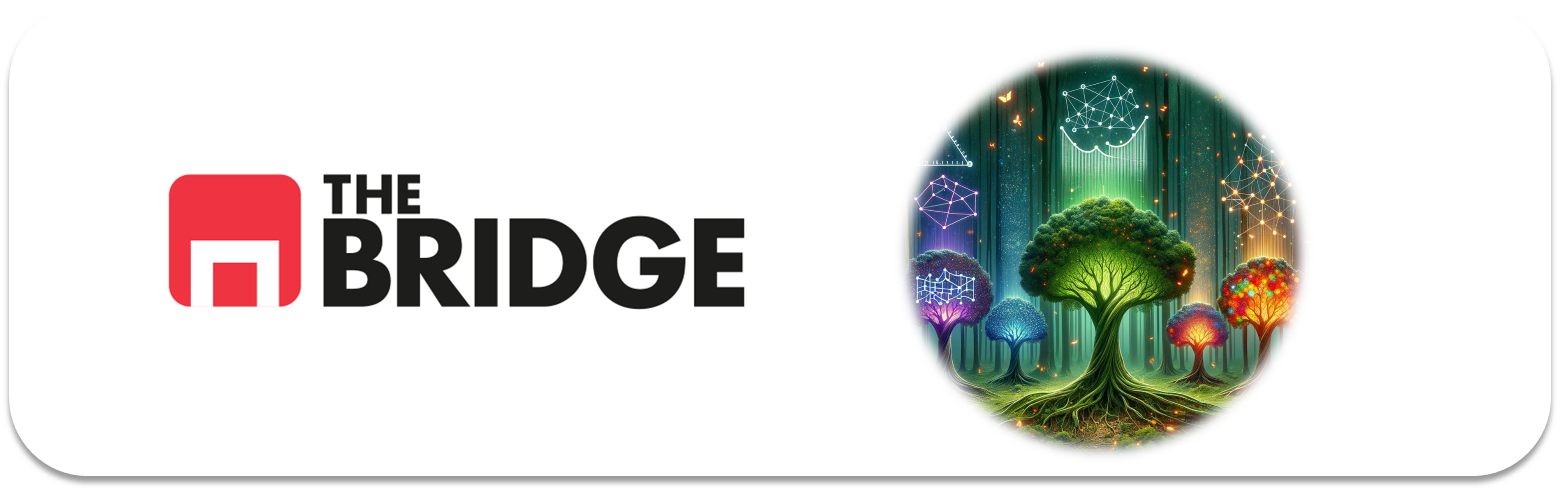

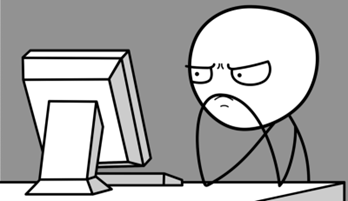

Para ejercitarte y afianzar lo aprendido sobre **Clasificacion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [13]:

import numpy as np
import pandas as pd
import sklearn


# Pintar!
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


### Ejercicio 1

Genera un conjunto de datos de lunas usando 

```python
make_moons(n_samples=10000, noise=0.4)
```

La función make_moons se encuentra en el módulo `datasets` de `sklearn`. Juega con ella para ver qué tipo de datos genera, y  crea un X_moons y un y_moons. Visualiza las moons con un scatter plot de las dos features de X_moons. (ojo X_moons es un array de numpy de dos dimesiones para acceder a la primera X_moons[:,0] y para la segunda...)

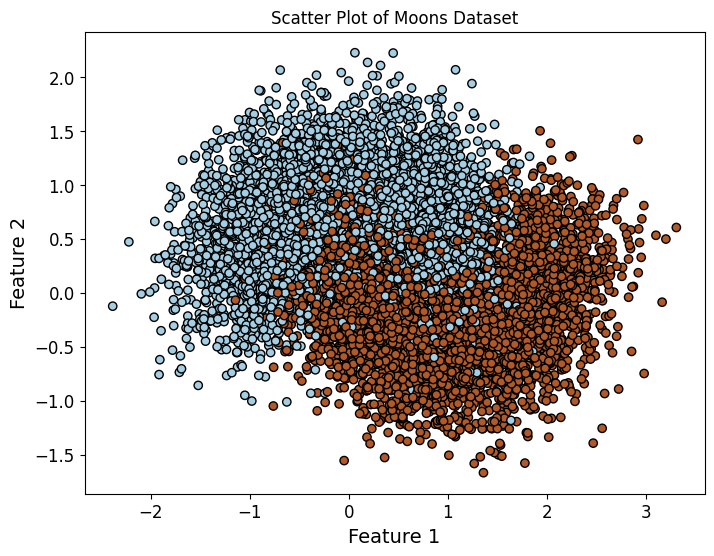

In [14]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

# Generar datos con make_moons
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Visualizar los datos con un scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap=plt.cm.Paired, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Moons Dataset')
plt.show()

### Ejercicio 2

El objetivo de los modelos que vamos a ir construyendo es aprender a clasificar correctamente en cada "luna" (moon) a un punto dadas sus coordenadas. Para ello crea un par de juegos X,y para train y test al 20% de test a partir de los puntos generados en el ejercicio anterior.

In [15]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8000, 2), (2000, 2), (8000,), (2000,))

### Ejercicio 3

Instancia un árbol de decisión de `sklearn` sin añadir hiperparámetros.

In [16]:

# Instanciar un árbol de decisión sin hiperparámetros
decision_tree = DecisionTreeClassifier()

# Mostrar el modelo inicializado
decision_tree


DecisionTreeClassifier()

### Ejercicio 4

Entrena el árbol y evalúalo contra test, usa para ello el classification_report de `sklearn`

In [17]:
from sklearn.metrics import classification_report

# Entrenar el árbol de decisión con los datos de entrenamiento
decision_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = decision_tree.predict(X_test)

# Evaluar el modelo con classification_report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1013
           1       0.80      0.81      0.81       987

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



### Ejercicio 5

Instancia un nuevo árbol con los hiperparámetros (argumentos del constructor), `max_depth` a 5 y `max_leaf_nodes` a 15. Busca en la documentación de `sklearn` el significado de ambos hiperparámetros.

In [18]:
tree_clf = DecisionTreeClassifier(max_depth=5,
                                  max_leaf_nodes=15)


### Ejercicio 6

Entrénalo, evaluálo contra test y muestra el resultado a través del classification_report.

In [19]:
tree_clf.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = decision_tree.predict(X_test)

# Evaluar el modelo con classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1013
           1       0.80      0.81      0.81       987

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



Comenta el resultado

*La mejor es sensible, debido a que el ajuste de hiperparámetros ha sido bastante bueno. En general los modelos basados en árboles necesitan un ajuste más fino que las regresiones (lineal, que apenas hay que hacer nada, y logística)*

### Ejercicio 7

Genera 1000 subconjuntos a partir del X_train, cada uno con 100 instancias seleccionadas aleatoriamente. Pista: Revisa la clase `ShuffleSplit` de `sklearn` para ayudarte con esto

In [21]:
from sklearn.model_selection import ShuffleSplit

# Configurar ShuffleSplit para generar 1000 subconjuntos con 100 instancias cada uno
shuffle_split = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)

# Crear los índices de los subconjuntos
subsets_indices = list(shuffle_split.split(X_train))

# Verificar el tamaño del primer subconjunto
len(subsets_indices), len(subsets_indices[0][0]), len(subsets_indices[0][1])  # Número de splits, tamaño del primer train, tamaño del primer test


(1000, 100, 7900)

### Ejercicio 8

Entrena un árbol de decisión por cada subconjunto anterior (ve acumulándolos en una lista, llámala "bosque" o "forest"). Emplea como hiperparámetros los del ejercicio 5.

In [22]:
# Lista para almacenar los árboles del bosque
forest = []

# Generar y entrenar un árbol para cada subconjunto
for train_indices, _ in shuffle_split.split(X_train):
    # Crear el subconjunto de entrenamiento
    X_subset = X_train[train_indices]
    y_subset = y_train[train_indices]
    
    # Instanciar y entrenar el árbol de decisión
    tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15)
    tree.fit(X_subset, y_subset)
    
    # Agregar el árbol al bosque
    forest.append(tree)

# Verificar el tamaño del bosque
print(f"Se han entrenado {len(forest)} árboles.")



Se han entrenado 1000 árboles.


### Ejercicio 9

Evalua cada árbol del bosque contra X_test original en la métrica de `accuracy` y muestra la media de todas las medidas. Emplea para ello `accuracy_score` de `sklearn`. Comenta el resultado.

In [23]:
from sklearn.metrics import accuracy_score

# Lista para almacenar las accuracies de cada árbol
accuracies = []

# Evaluar cada árbol del bosque
for tree in forest:
    # Realizar predicciones en el conjunto de prueba
    y_pred = tree.predict(X_test)
    
    # Calcular la accuracy y almacenarla
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Calcular y mostrar la media de las accuracies
mean_accuracy = sum(accuracies) / len(accuracies)
print(f"Accuracy promedio de los árboles del bosque: {mean_accuracy:.4f}")


Accuracy promedio de los árboles del bosque: 0.8112


*Como era un poco de esperar un árbol entrenado con menor cantidad de datos no está a la altura de otro entrenado sobre el mismo dataset pero con mayor cantidad de información (81% vs 86%). Es lo que se denomina weak_learner*

### Ejercicio 10

Vamos a hacer un consejo de árboles... Es decir ahora vuelve a predecir las instancias de X_test para cada árbol pero guarda las predicciones en una lista. Es decir crea una lista con los 1000 conjuntos de predicciones (uno por cada árbol)

### Ejercicio 11

Ahora vamos a construir la predicción final del consejo de árboles mediante un mecanismo de "hard-voting" es decir para cada predicción escoge la clase más votada. Puedes hacerlo recorriendo cada lista de predicciones y contando cual clase tiene más votos y apuntándolo o usando `mode` (la moda) de `scipy`

In [20]:
# Ejemplo de votación para la primera instancia de X_test
Y_pred_consejo = []
votos_0 = 0
votos_1 = 0
for i in range(n_trees):
    if predicciones_list[i][0] == 0:
        votos_0 += 1
    else:
        votos_1 += 1

if votos_0 > votos_1:
    Y_pred_consejo.append(0)
else:
    Y_pred_consejo.append(1)

NameError: name 'n_trees' is not defined

### Ejercicio 12

Evalua las predicciones del consejo contra y_test y comenta el resultado. Utiliza `accuracy_score`